# Завдання 1 
## Для заданої таблиці значень 5.1 (n+1 точка) побудувати інтерполяційний багаточлен відповідного типу. Обчислити значення функції у середніх точках кожного відрізку. Об’єднати початкові значення і ті, що були обчислені додатково (2n+1 точка), побудувати інтерполяційний багаточлен більшого ступеня. Навести графіки отриманих функцій і початкові точки.


In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [3]:
x_values = [-1., -0.5, 0, 0.5, 1.]
y_values = [0, 2., 2.25, 3., 1.25]

In [4]:
# Будуємо інтерполяційний багаточлен першого ступеня
lagrange_interpolant_1 = lagrange(x_values, y_values)

In [5]:
x = np.linspace(min(x_values), max(x_values), 100)
y_interpolated_1 = lagrange_interpolant_1(x)

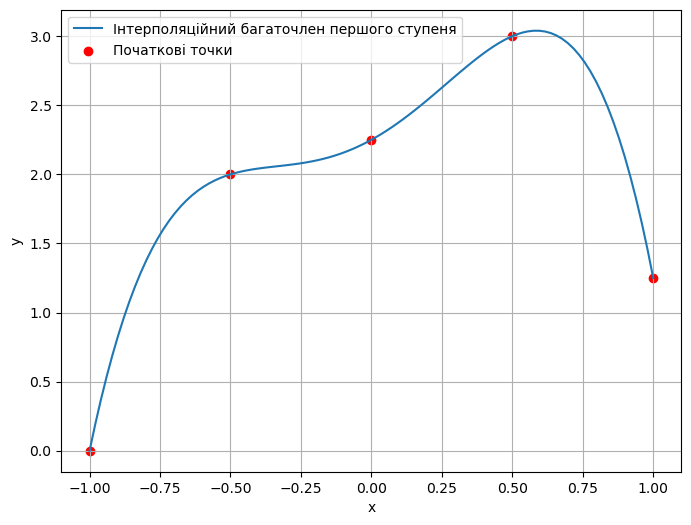

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(x, y_interpolated_1, label='Інтерполяційний багаточлен першого ступеня')
plt.scatter(x_values, y_values, color='red', label='Початкові точки')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Обчислюємо значення функції у середніх точках кожного відрізку
x_midpoints = []
y_interpolated_1 = []
for i in range(len(x_values) - 1):
    x_midpoint = (x_values[i] + x_values[i+1]) / 2
    y_interpolated = lagrange_interpolant_1(x_midpoint)

    x_midpoints.append(x_midpoint)
    y_interpolated_1.append(y_interpolated)

# Будуємо інтерполяційний багаточлен другого ступеня
x_values_extended = np.concatenate((x_values, x_midpoints))
y_values_extended = np.concatenate((y_values, y_interpolated_1))
lagrange_interpolant_2 = lagrange(x_values_extended, y_values_extended)

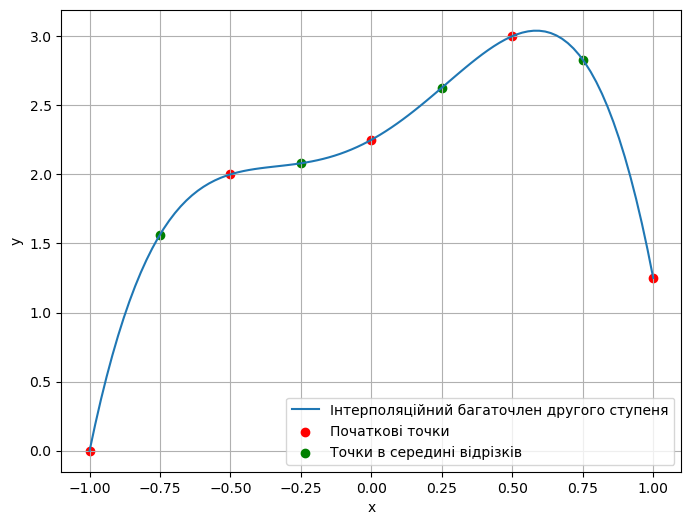

In [8]:
# Обчислюємо значення функції на розширеному наборі точок
x = np.linspace(min(x_values_extended), max(x_values_extended), 100)
y_interpolated_2 = lagrange_interpolant_2(x)

# Будуємо графік
plt.figure(figsize=(8, 6))
plt.plot(x, y_interpolated_2, label='Інтерполяційний багаточлен другого ступеня')
plt.scatter(x_values, y_values, color='red', label='Початкові точки')
plt.scatter(x_midpoints, y_interpolated_1, color='green', label='Точки в середині відрізків')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Завдання 2 
## За аналітично заданою функцією (табл. 5.2) сформувати регулярну таблицю вузлів (бажано, щоб амплітуда інтервалу не перевищувала 1), наблизити отримані дані інтерполяційним поліномом. Визначити апріорну і апостеріорну похибки інтерполяції. Навести графіки функцій: початкової, інтерпольованої, розбіжностей.


In [30]:

def f(x):
    return x * np.log(x) - 100

# Вузли
x = np.linspace(1, 2, 5)
y = f(x)

# Інтерполяція
poly = lagrange(x, y)
x_interp = np.linspace(1, 2, 100)
y_interp = poly(x_interp)

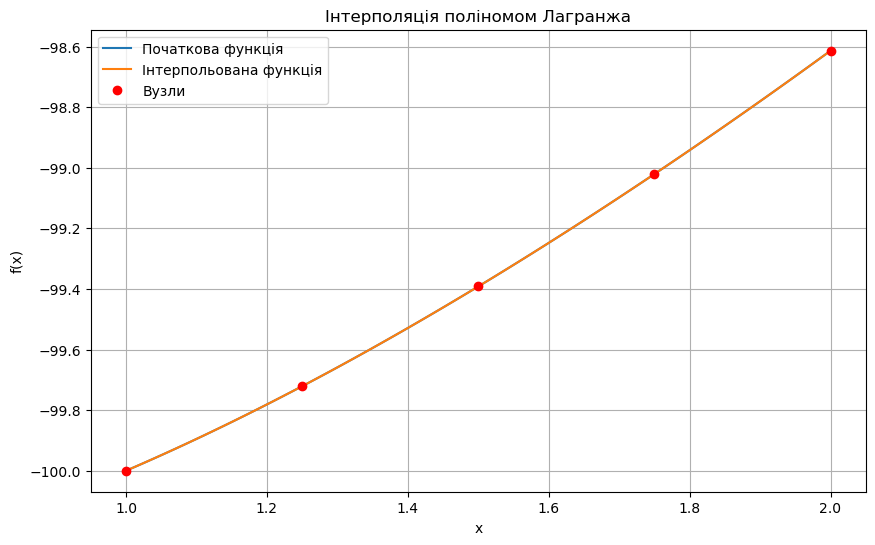

In [46]:
plt.figure(figsize=(10, 6))

plt.plot(x_interp, f(x_interp), label='Початкова функція')
plt.plot(x_interp, y_interp, label='Інтерпольована функція')
plt.plot(x, y, 'ro', label='Вузли')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Інтерполяція поліномом Лагранжа')
plt.legend()
plt.grid(True)
plt.show()

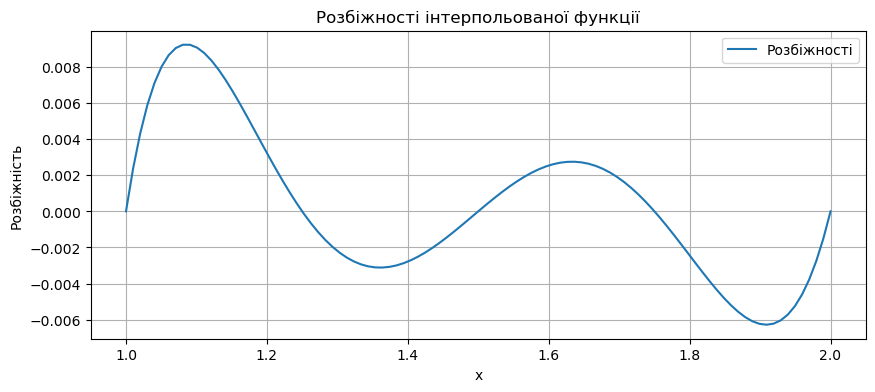

In [56]:
# Розбіжності
residuals = f(x_interp)**2 - y_interp**2

plt.figure(figsize=(10, 4))


plt.plot(x_interp, residuals, label='Розбіжності')
plt.xlabel('x')
plt.ylabel('Розбіжність')
plt.title('Розбіжності інтерпольованої функції')
plt.legend()
plt.grid(True)
plt.show()

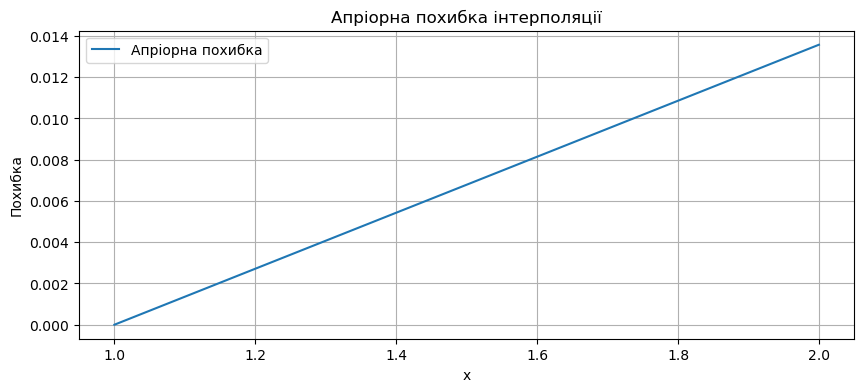

In [41]:
# Апріорна похибка
def a_priori_error(x, y, x_interp):
    n = len(x) - 1
    f_prime = np.gradient(y, x)
    error = np.abs(x_interp - x[0]) * np.max(np.abs(f_prime)) / np.math.factorial(n+1)
    return error

a_priori = a_priori_error(x, y, x_interp)
apriori_error = max(a_priori)

plt.figure(figsize=(10, 4))

plt.plot(x_interp, a_priori, label='Апріорна похибка')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Апріорна похибка інтерполяції')
plt.legend()
plt.grid(True)
plt.show()

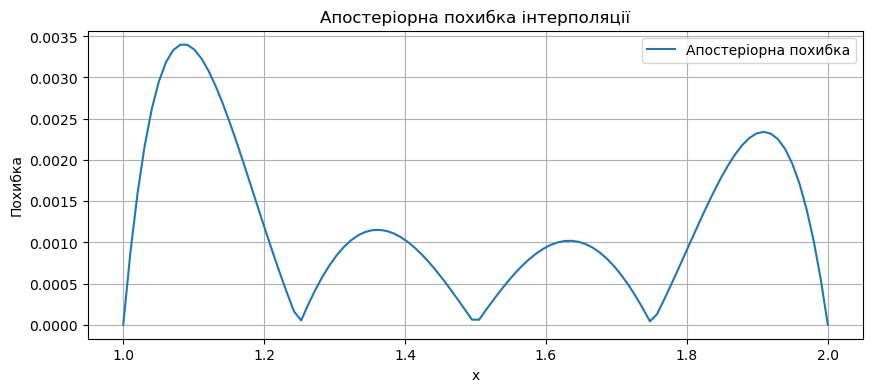

In [44]:
# Апостеріорна похибка
def a_posteriori_error(x, y, x_interp):
    f_prime = np.gradient(y, x)
    error = np.abs(f(x_interp) - poly(x_interp)) / np.abs(f_prime.max() / np.math.factorial(len(x)))
    return error

a_posteriori = a_posteriori_error(x, y, x_interp)

aposterior_error = max(a_posteriori)

plt.figure(figsize=(10, 4))

plt.plot(x_interp, a_posteriori, label='Апостеріорна похибка')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Апостеріорна похибка інтерполяції')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
print('Апріорна похибка', apriori_error)
print('Апостеріорна похибка', aposterior_error)

Апріорна похибка 0.013565557741096749
Апостеріорна похибка 0.0033973663127296583


# Завдання 3 
## За даними з п.1 (2n+1 точка) виконати сплайн-інтерполяцію. Навести графіки функцій: інтерпольованої відповідним багаточленом, сплайн-інтерполяції, розбіжностей.


In [12]:
x_midpoints

[-0.75, -0.25, 0.25, 0.75]

In [13]:
y_interpolated_1

[1.5644531249999996, 2.080078125, 2.626953125, 2.830078125]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

# Задані точки
x_values = sorted(x_values_extended)
y_values = [0, 1.56445312, 2., 2.08007812, 2.25, 2.62695312,  3., 2.83007812, 1.25]
print(x_values)
print(y_values)

[-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
[0, 1.56445312, 2.0, 2.08007812, 2.25, 2.62695312, 3.0, 2.83007812, 1.25]


In [15]:
# Створення сплайн-інтерполяції
tck = splrep(x_values, y_values)

# Обчислення значень сплайн-інтерполяції
x = np.linspace(min(x_values), max(x_values), 100)
y_spline = splev(x, tck)

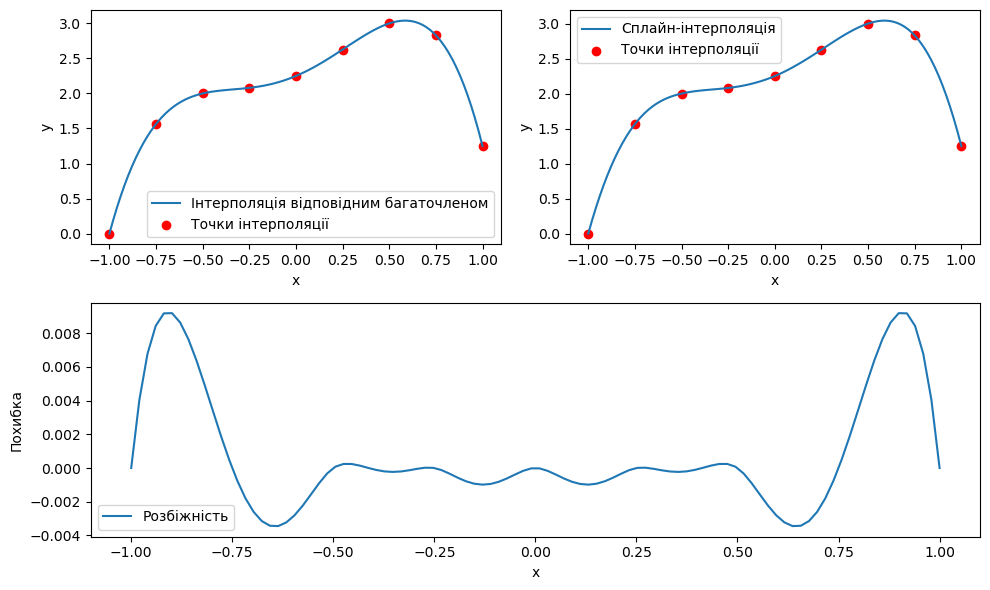

In [16]:
# Побудова графіків
plt.figure(figsize=(10, 6))

# Інтерполяція відповідним багаточленом
plt.subplot(2, 2, 1)
plt.plot(x, y_interpolated_2, label='Інтерполяція відповідним багаточленом')
plt.scatter(x_values, y_values, color='red', label='Точки інтерполяції')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#  Сплайн-інтерпольована функція
plt.subplot(2, 2, 2)
plt.plot(x, y_spline, label='Сплайн-інтерполяція')
plt.scatter(x_values, y_values, color='red', label='Точки інтерполяції')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Розбіжності
plt.subplot(2, 1, 2)
plt.plot(x, y_interpolated_2 - y_spline, label='Розбіжність')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.legend()

plt.tight_layout()
plt.show()

# Завдання 4 
## Провести наближення за даними з п.1 (2n+1 точка) методом найменших квадратів. Максимальні ступені наближення обрати самостійно. Навести графіки для порівняння.


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
x_val = np.linspace(min(x_values), max(x_values), 100)
y_val = lagrange_interpolant_1(x_val)

In [50]:
# Будуємо поліном
x_val = np.array(x_val)
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_x = poly.fit_transform(x_val.reshape(-1, 1))

In [51]:
# Метод найменших квадратів

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_x, y_val)
y_pred = poly_reg_model.predict(poly_x)

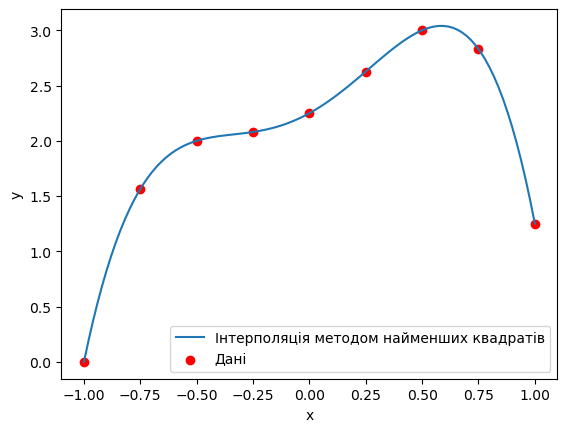

In [52]:
# Будуємо графік

plt.plot(x_val, y_pred, label='Інтерполяція методом найменших квадратів')
plt.scatter(x_values, y_values, color='red', label='Дані')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()